# TensorFlow Basics
**Autor:** Dimitri Ngatcha Pokouane

## Tutorials

Some python libraries are required to accomplish the tasks assigned in this homework. If you feel like you need to follow a tutorial before, feel free to do so:

*   [Scikit-learn Tutorials](https://www.tensorflow.org/tutorials)
*   [TensorFlow Tutorials](https://scikit-learn.org/stable/tutorial/index.html)
*   [Matplotlib Tutorials](https://matplotlib.org/stable/tutorials/index.html)

## Imports

Jupyter notebook provides the possibility of using libraries, functions and variables globally. This means, once you import the libraries, functions, etc. you won't have to import them again in the next cell. However, if for any reason you end the session (crash, timeout, etc.), then you'll have to run this cell to have your libraries imported again. So, let's go ahead and import whatever we need in this homework assignment.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import tensorflow as tf

import matplotlib.pyplot as plt
import seaborn as sns


## System checks

Perform some rudimentary system checks. Do we have a CUDA-capable device? Multiple? Is CuDNN active (huge speedups for some networks)?

In [ ]:
gpus = tf.config.list_physical_devices('GPU')
cpus = tf.config.list_physical_devices('CPU')
print(gpus)
print(cpus)

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


If you see now that now that there is no CUDA-capable device available, you have to activate the GPU.

Go to Edit -> Notebook settings -> Select GPU as Hardware accelerator.

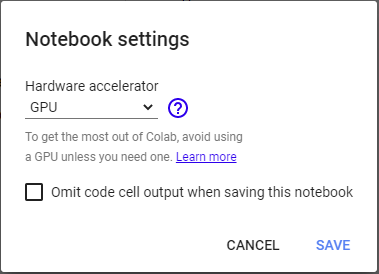

Now check the availability again.

In [ ]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

Choose your device for computation. CPU or one of your CUDA devices

In [ ]:
tf.config.set_visible_devices(gpus, 'GPU')

# Subtask 1.1

## Tensors

Let us create a tensorflow tensor:

In [ ]:
a = tf.constant([[1.0, 2.0],
                 [3.0, 4.0]])

and find out what the properties of this tensor 'a' are.

In [ ]:
# TODO print the array
print(a)


tf.Tensor(
[[1. 2.]
 [3. 4.]], shape=(2, 2), dtype=float32)


In [ ]:
# TODO print its type
print(type(a))


<class 'tensorflow.python.framework.ops.EagerTensor'>


In [ ]:
# TODO print its shape

print(a.shape)


(2, 2)


In [ ]:
# TODO convert the tensor to a numpy array and print its size again
a_np = a.numpy()
print(a_np)
print(a_np.shape)


[[1. 2.]
 [3. 4.]]
(2, 2)


Let's create another tensor and do a few basic math operation.

In [ ]:
b = tf.constant([[1.0, 1.0],
                 [1.0, 1.0]]) # Could have also said `tf.ones([2,2])`

print(tf.add(a, b), "\n")
print(tf.multiply(a, b), "\n")
print(tf.matmul(a, b), "\n")

tf.Tensor(
[[2. 3.]
 [4. 5.]], shape=(2, 2), dtype=float32) 

tf.Tensor(
[[1. 2.]
 [3. 4.]], shape=(2, 2), dtype=float32) 

tf.Tensor(
[[3. 3.]
 [7. 7.]], shape=(2, 2), dtype=float32) 



In [ ]:
# or
print(a + b, "\n") # element-wise addition
print(a * b, "\n") # element-wise multiplication
print(a @ b, "\n") # matrix multiplication

tf.Tensor(
[[2. 3.]
 [4. 5.]], shape=(2, 2), dtype=float32) 

tf.Tensor(
[[1. 2.]
 [3. 4.]], shape=(2, 2), dtype=float32) 

tf.Tensor(
[[3. 3.]
 [7. 7.]], shape=(2, 2), dtype=float32) 



Now, let's do the following operations on tensor 'a'.
**Note:** Do not convert the tensors to NumPy.

In [ ]:
# TODO compute the mean
mean = tf.reduce_mean(a)

print("The mean of tensor a:", mean)


The mean of tensor a: tf.Tensor(2.5, shape=(), dtype=float32)


In [ ]:
# TODO find the index of the smallest value
index = tf.argmin(a)

print("The index of the smallest value in tensor a is:", index.numpy())


The index of the smallest value in tensor a is: [0 0]


In [ ]:
# TODO compute the log
log_a = tf.math.log(a)

print("The logarithm of tensor a is:")
print(log_a)

The logarithm of tensor a is:
tf.Tensor(
[[0.        0.6931472]
 [1.0986123 1.3862944]], shape=(2, 2), dtype=float32)


In [ ]:
# TODO print out a single value from the tensor
value = a[0, 1]

print("The value at row 0, column 1 in tensor a:", value.numpy())


The value at row 0, column 1 in tensor a: 2.0


In [ ]:
# TODO reshape the tensor to a new shape
new_shape = [1, 4]
reshaped_a = tf.reshape(a, new_shape)

print("Reshaped tensor a:")
print(reshaped_a)


Reshaped tensor a:
tf.Tensor([[1. 2. 3. 4.]], shape=(1, 4), dtype=float32)


# Subtask 1.2

## Variables
A tf.Variable represents a tensor whose value can be changed by running ops on it. Specific ops allow you to read and modify the values of this tensor. Higher level libraries like tf.keras use tf.Variable to store model parameters.

In [ ]:
numpyarray = np.arange(10).reshape(2, 5)
# create a tensorflow variable
a = tf.Variable(numpyarray, dtype=tf.float32)


**TODO Your answer here**

Is tensor 'a' a trainable variable and what does it mean?

**Yes, tensor an is a variable, but it is not by default a trainable variable because we did not express it explicitly when we created the variable. Trainable variables are commonly used in TensorFlow to describe model parameters that are learned during training. During training, an optimization algorithm updates these variables in order to minimize the loss function. When generating the variable, we may set the trainable argument to True to create a trainable variable.**


### Placing variables

For better performance, TensorFlow will attempt to place tensors and variables on the fastest device compatible, however, you can override this.

In [ ]:
with tf.device('CPU:0'):
  # Create some tensors
  a = tf.Variable([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
  b = tf.Variable([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]])
  c = a @ b

print(c)

tf.Tensor(
[[22. 28.]
 [49. 64.]], shape=(2, 2), dtype=float32)


In [ ]:
# TODO create two tf.variables using device 'CPU:0' and do matrix multiplication on device 'GPU:0'

# Create two variables on CPU:0
with tf.device('CPU:0'):
  a = tf.Variable([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
  b = tf.Variable([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]])

# Multiply the variables on GPU:0
with tf.device('GPU:0'):
  c = tf.matmul(a, b)

# Print the result
print(c)




tf.Tensor(
[[22. 28.]
 [49. 64.]], shape=(2, 2), dtype=float32)


# Subtask 1.3

### Loading the flood dataset

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Flood_Data_Classification.csv to Flood_Data_Classification.csv


In [ ]:
data = pd.read_csv('Flood_Data_Classification.csv')
data

,Margarethenklippe,Sennhuette,labels
0,6.5,4.1,0.0
1,6.4,4.1,0.0
2,6.3,3.9,0.0
3,6.3,3.9,0.0
4,6.4,4.1,0.0
...,...,...,...
6245,6.9,3.3,0.0
6246,6.9,3.4,0.0
6247,6.8,3.5,0.0
6248,6.7,3.2,0.0


# Subtask 1.4

### Inspect the data
Let us plot the data for each of the variables and color them based on the labels:

**Note:** Do not forget to add title, axis labels and a legend!
This applies in general, please keep in mind for future exercise sheets.

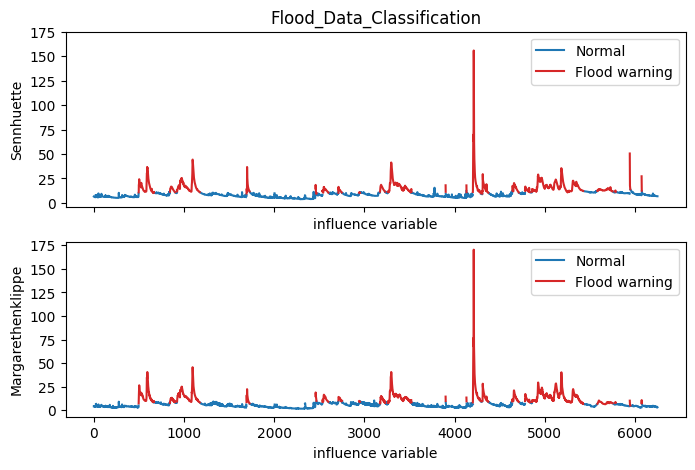

In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(8, 5), sharex=True)

ax[0].plot(np.where(data['labels']==0, data['Margarethenklippe'], None), color='tab:blue', label='Normal')

# TODO fill in the missing lines ...
ax[0].plot(np.where(data['labels']!=0, data['Margarethenklippe'], None), color='tab:red', label='Flood warning')
ax[0].set_xlabel('influence variable')
ax[0].set_ylabel('Sennhuette')
ax[0].set_yticks(np.arange(0, max(data['Margarethenklippe'])+25, 25))
ax[0].set_title('Flood_Data_Classification')
ax[0].legend()
ax[1].plot(np.where(data['labels']==0, data['Sennhuette'], None), color='tab:blue', label='Normal')
ax[1].plot(np.where(data['labels']!=0, data['Sennhuette'], None), color='tab:red', label='Flood warning')
ax[1].set_xlabel('influence variable')
ax[1].set_ylabel('Margarethenklippe')
ax[1].set_yticks(np.arange(0, max(data['Margarethenklippe'])+25, 25))
ax[1].legend()

plt.show()



Moreover, it is beneficial to plot the pairwise correlation of the variables to see how they are correlated.

**Note:** Do not forget to add title, axis labels and a legend!
This applies in general, please keep in mind for future exercise sheets.

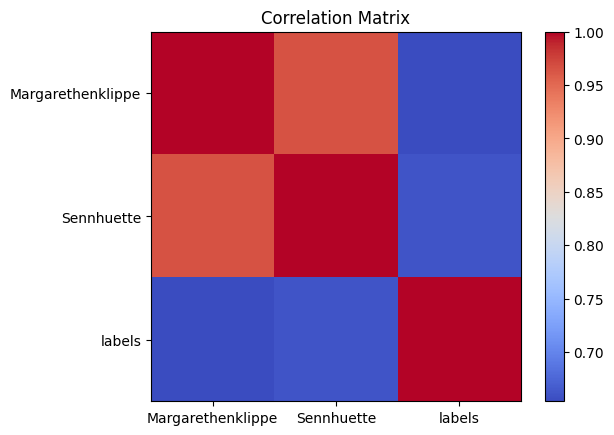

In [ ]:
# TODO fill in the missing lines
# TODO plot the correlation matrix using pyplot.imshow
corr = data.corr()

fig, ax = plt.subplots()
im = ax.imshow(corr, cmap='coolwarm')

# Show all ticks and label them with the respective list entries
ax.set_xticks(range(len(corr.columns)))
ax.set_yticks(range(len(corr.columns)))
ax.set_xticklabels(corr.columns)
ax.set_yticklabels(corr.columns)

# Add colorbar
cbar = ax.figure.colorbar(im, ax=ax)

# Set axis labels and title
ax.set_title("Correlation Matrix")

# Show the plot
plt.show()

Another interesting plot that may give you a good understanding about the complexity of the dataset is the pairwise relationships. We can use *seaborn* library as below.

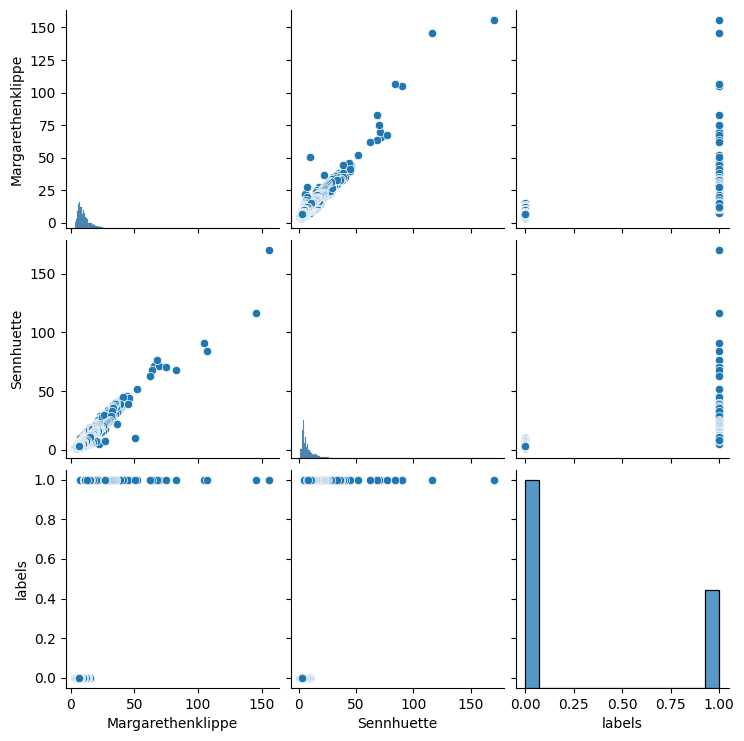

In [ ]:
sns.pairplot(data)

# Subtask 1.5

### Split the data to inputs and outputs

We consider the data from Margarethenklippe and Sennhuette, i.e. the first two columns, as the input and design a classifier based on the perceptron algorithm to detect flood events.
Therefore, we have:

In [ ]:
# TODO fill in the missing lines
X = data[['Margarethenklippe', 'Sennhuette']].values
y = data['labels'].values


In [ ]:
## TODO # Compute the statistics of the input data
print("Input statistics of Margarethenklippe:")
print("Count: ", len(X))
print("Mean: ", np.mean(X, axis=0))
print("Std: ", np.std(X, axis=0))
print("Min: ", np.min(X, axis=0))
print("Max: ", np.max(X, axis=0))
print("Input statistics of Sennhuette:")
print("Count: ", len(X))
print("Mean: ", np.mean(X, axis=1))
print("Std: ", np.std(X, axis=1))
print("Min: ", np.min(X, axis=1))
print("Max: ", np.max(X, axis=1))

# Compute the statistics of the output data
print("\nOutput statistics:")
print("Count: ", len(y))
print("Mean: ", np.mean(y))
print("Std: ", np.std(y))
print("Min: ", np.min(y))
print("Max: ", np.max(y))


Input statistics of Margarethenklippe:
Count:  6250
Mean:  [10.55344   7.821264]
Std:  [6.39627906 6.64166779]
Min:  [3.7 1.5]
Max:  [155.8 170.4]
Input statistics of Sennhuette:
Count:  6250
Mean:  [5.3  5.25 5.1  ... 5.15 4.95 4.95]
Std:  [1.2  1.15 1.2  ... 1.65 1.75 1.85]
Min:  [4.1 4.1 3.9 ... 3.5 3.2 3.1]
Max:  [6.5 6.4 6.3 ... 6.8 6.7 6.8]

Output statistics:
Count:  6250
Mean:  0.3208
Std:  0.46678406142455203
Min:  0.0
Max:  1.0


# Subtask 1.6
### Training/validation data and normalization

Let's consider 50% of the data for training and 50% for validation:


In [ ]:
# TODO shuffle the samples
np.random.seed(24)
idx = np.arange(len(X))
np.random.shuffle(idx)

X = X[idx]
y = y[idx]

In [ ]:
# TODO split data to train and validation
N_train = int(0.5 * len(X))
x_train, x_test, y_train, y_test = X[:N_train], X[N_train:], y[:N_train], y[N_train:]

In the table of statistics it's easy to see how different the ranges of each feature are. It is good practice to normalize features that use different scales and ranges.

In [ ]:
# TODO Normalize both input and the output using the statistics (mean and std) of the training data
mu = x_train.mean()
std = x_train.std()

x_train = (x_train - mu) / std
x_test = (x_test - mu) / std

# Subtask 1.7
### Classification based on the perceptron algorithm.

Let's build and train a model as:
\begin{equation}
y = sign(\mathbf{w}^{\mathtt{T}}X),
\end{equation}
where $\mathbf{w}$ represents the weights. We need to do the following steps:
 - Create the model by initializing the weights.
 - Define the loss function.
 - Train the model. We will use the perceptron algorithm to minimize the loss.

First, let us define a function for plotting the results as:

In [ ]:
def plot(w, X, y):
    """ Defines the plot function:
    inputs: w (N + 1) array
            X (M, N) array
            y (M) array
    returns:
    """
    a = -w[1] / w[2]
    xx = np.linspace(X.min(), 0.5 * X.max())
    yy = a * xx + w[0] / w[1]
    fig, ax = plt.subplots(1, 1, figsize = (4, 4))
    ax.scatter(X[:,0], X[:,1], c = y, cmap = 'bwr', label = 'Data')
    ax.plot(xx, yy, 'k', label = 'Classifier')

    ax.set_xlabel('Margarethenklippe')
    ax.set_ylabel('Sennhuette')
#     ax.set_aspect('equal')
    ax.legend()

In [ ]:
# TODO use the plot function above to show the results for the training data and the suggested weights:
W = [0.1, 0.05, 1.0]



## Create the perceptron model as a Python class

We will need the following functions:
- **init**: where you can initialize the model parameters and set the learning rate.
- **loss_fn**: where the loss (or error) needs to be computed by comparing the prediction to the reference data.
- **call**: or the forward pass, where the prediction is made using the previously defined model on the input data.
- **train_step**: where we define the computation performed at one step of training. Here, the model learns and updates its weights.
- **test_step**: where we define the computation performed at one step of evaluation.

In [ ]:
class Perceptron():
    """
    Classification model based on the perceptron algorithm.
    """
    def __init__(self, input_dim = 2, lr = 0.001):
        # TODO define the model weights
        self.input_dim = input_dim
        self.W = np.zeros((input_dim + 1, 1))

        self.lr = lr

        # TODO Define the optimizer. In this case, we use Stochastic Gradient Descent (SGD).

    def loss_fn(self, y_pred, y_true):
        """ Defines the loss function """
        # TODO compute the loss
        loss = y_true - y_pred
        return loss


    def call(self, inputs):
        """ Defines the computation performed at every call. """
        # TODO run the data through the layer
        inputs = np.hstack([np.ones((len(inputs), 1)), inputs])
        z = np.dot(inputs, self.W)
        outputs = np.sign(z)
        return outputs.reshape((-1, 1))

    def train_step(self, data):
        """ Defines the computation performed at one step of training.
            This typically includes the:
            - forward pass
            - loss calculation
            - weight updates.
            - metric updates.
        """
        inputs, labels = data

        # TODO compute the loss and update the weights

        outputs = self.call(inputs)
        loss = self.loss_fn(outputs, labels)

        inputs = np.hstack([np.ones((len(inputs), 1)), inputs])
        updates = (inputs * loss * self.lr).mean(0)

        self.W += updates.reshape((-1, 1))

        return (loss**2).mean()

    def test_step(self, data):
        """ Defines the computation performed at one step of evaluation.
            This typically includes the:
            - forward pass
            - loss calculation
            - metric updates.
        """
        inputs, labels = data

        # TODO compute the gradients and update the weights
        outputs = self.call(inputs)
        loss = self.loss_fn(outputs, labels)

        return (loss**2).mean()



## Instantiate the model

In [ ]:
# TODO instantiate the model using the Perceptron class you defined
model = Perceptron(input_dim=2, lr=0.001)

# Subtask 1.8
### Train the model

Everything is set for the model to train! Now, we need a training loop:

In [ ]:
# TODO fill in the missing lines
batch_size=6000
num_epochs = 20
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(batch_size)
test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(batch_size)
train_losses = []
test_losses = []
hist = {'loss':[], 'val_loss':[]}
# Training loop
for epoch in range(num_epochs):
    # TODO Train loop
    loss = tf.keras.metrics.Mean()
    for x_batch, y_batch in train_dataset:
        loss(model.train_step((x_batch, y_batch))["loss"])
       train_losses.append(loss.result())
    # TODO Test loop
    val_loss = tf.keras.metrics.Mean()
    for x_batch, y_batch in test_dataset:
        val_loss(model.test_step((x_batch, y_batch))["loss"])
    test_losses.append(val_loss.result())
    # Print progress
    hist['loss'].append(loss)
    hist['val_loss'].append(val_loss)
    print(f"Epoch {epoch + 1}: train loss = {loss:.4f}, test loss = {val_loss:.4f}")

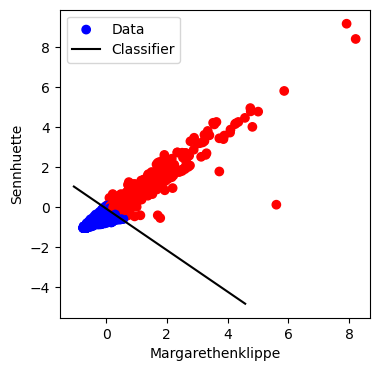

In [ ]:
# TODO plot the results for the learned weights using our plot function
def plot_loss(history):
    plt.plot(history['loss'], label='train')
    plt.plot(history['val_loss'], label='test')
    plt.title('Model loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

plot_loss(hist)

# Subtask 1.9

### Plot the training and validation error

Create a plot using pyplot that contains both the losses on training set and the losses on the validation set.

**Note:** Do not forget to add title, axis labels and a legend!
This applies in general, please keep in mind for future exercise sheets.

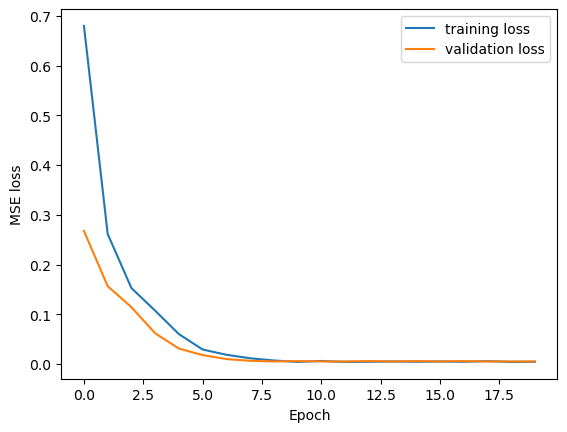

In [ ]:
# TODO visualize the model's training progress

plt.plot(hist['loss'], label='Training loss')
plt.plot(hist['val_loss'], label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Subtask 1.10

### Plot the confusion matrix

Compute the confusion matrix using the *sklearn* library and plot it using *seaborn.heatmap*.

**Note:** Do not forget to add title, axis labels and a legend!
This applies in general, please keep in mind for future exercise sheets.

<AxesSubplot: >

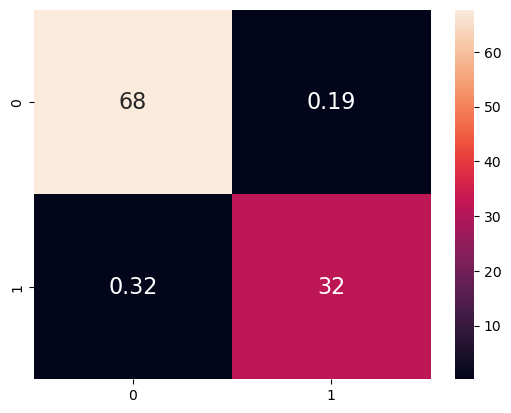

In [ ]:
# TODO compute the confusion matrix

y_pred = model.call(x_test)

cm = confusion_matrix(y_test, y_pred)
cm = cm / len(y_test) * 100

# TODO visualize the confusion matrix

sns.heatmap(cm, annot=True, fmt='.1f', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted ')
plt.ylabel('True')
plt.show()